In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from numpy import mean, median
from scipy import stats

In [2]:
print('====================================================')
print('*** 1. Tạo mảng dữ liệu chứa từ nội dung tập tin ***')
print('====================================================')
LDS3folder = 'E:\Data Science\Mathematics and Statistics for Data Science\Excercise'
folder = LDS3folder + '\Data\B5/'
f          = open(folder + 'life_batteries.txt', 'r')

content    = f.read()
f.close()
print('Data:\n', content, '\n')

life       = content.split()
life       = list(map(int, life))
life_array = np.array(life)
print('Life array:\n', type(life_array), '(', life_array.size, ')\n', life_array, '\n')

*** 1. Tạo mảng dữ liệu chứa từ nội dung tập tin ***
Data:
 130	145	126	146
164	130	132	152
145	129	133	155
140	127	139	137
131	126	145	148
125	132	126	126
126	135	131	129
147	136	129	136
156	146	130	146
132	142	132	132
 

Life array:
 <class 'numpy.ndarray'> ( 40 )
 [130 145 126 146 164 130 132 152 145 129 133 155 140 127 139 137 131 126
 145 148 125 132 126 126 126 135 131 129 147 136 129 136 156 146 130 146
 132 142 132 132] 



*** 2. Vẽ biểu đồ phân phối tần suất của dữ liệu    ***


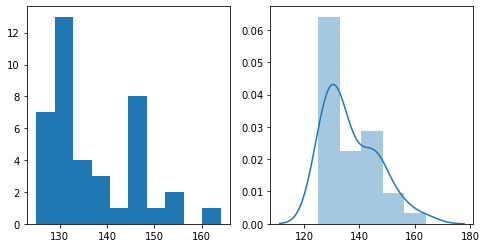

In [3]:
print('=======================================================')
print('*** 2. Vẽ biểu đồ phân phối tần suất của dữ liệu    ***')
print('=======================================================')
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.hist(life_array)
plt.subplot(1, 2, 2)
sns.distplot(life_array)
plt.show()

In [5]:
print('========================================================')
print('*** 3. Vẽ histogram cho các khoảng:                  ***')
print('***    120-129, 130-139, 140-149, 150-159, 160-169.  ***')
print('========================================================')
freq = pd.Series()
freq['120-129'] = np.extract((life_array >= 120) & (life_array <= 129), life_array).size
freq['130-139'] = np.extract((life_array >= 130) & (life_array <= 139), life_array).size
freq['140-149'] = np.extract((life_array >= 140) & (life_array <= 149), life_array).size
freq['150-159'] = np.extract((life_array >= 150) & (life_array <= 159), life_array).size
freq['160-169'] = np.extract((life_array >= 160) & (life_array <= 169), life_array).size
print('Bảng phân phối tần suất:\n', freq)

*** 3. Vẽ histogram cho các khoảng:                  ***
***    120-129, 130-139, 140-149, 150-159, 160-169.  ***
Bảng phân phối tần suất:
 120-129    10
130-139    16
140-149    10
150-159     3
160-169     1
dtype: int64


<ipython-input-5-e59f74f708d1>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  freq = pd.Series()


*** 4. Vẽ biểu đồ khối và nhận xét                  ***


<BarContainer object of 5 artists>

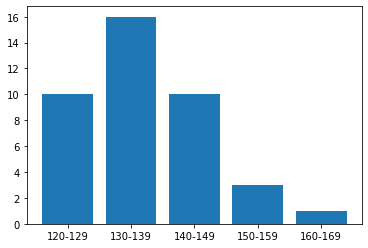

In [7]:
print('=======================================================')
print('*** 4. Vẽ biểu đồ khối và nhận xét                  ***')
print('=======================================================')
plt.bar(freq.index, freq)

# Nhận xét:
#    Hầu hết dữ liệu tập trung trong khoảng 130-139, với một vài điểm vượt quá 150.
#    Có thể kết luận: trung tâm của dữ liệu là một điểm nào đó trong khoảng 130-139.
#    Từ 2 biểu đồ trên, có thể xác định nhiều biện pháp phân tán và xu hướng trung tâm:???
#

*** 5. Những thống kê cơ bản trên dữ liệu  y ***
Mean   x_    = 136.85
MIN    x_min = 125
MAX    x_max = 164
Median x_med = 132.5
Mode   x_mod = 126
       f(x)  = 5
Range        = 39
Variance     = 93.4775
Std-dev.     = 9.66837628560246


<AxesSubplot:>

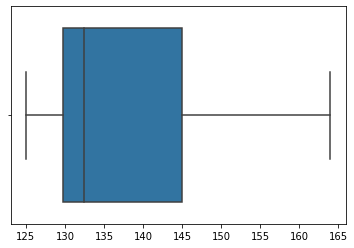

In [8]:
print('================================================')
print('*** 5. Những thống kê cơ bản trên dữ liệu  y ***')
print('================================================')
print('Mean   x_    =', mean(life_array))
print('MIN    x_min =', min(life_array))
print('MAX    x_max =', max(life_array))
print('Median x_med =', median(life_array))

x_mod = stats.mode(life_array)
print('Mode   x_mod =', x_mod[0][0])
print('       f(x)  =', x_mod[1][0]) # số lần freq.

range_life = np.ptp(life_array)
print('Range        =', range_life)

var_life = np.var(life_array)
print('Variance     =', var_life)

std_life = np.std(life_array)
print('Std-dev.     =', std_life)

## Vẽ box plot --> không có outlier

## Ngắt breakpoint tại đây
## Chạy tiếp tục mới cho kết quả đúng (?!) 
sns.boxplot(life_array)

In [9]:
print('=================================================')
print('*** 6. Tìm độ nhọn, độ xiên. Nhận xét kết quả ***')
print('=================================================')
# 
skew_life = stats.skew(life_array)
print('Skewness     =', skew_life) # > 0: phân phối lệch PHẢI

kur_life = stats.kurtosis(life_array) # fisher = True (default) --> (kur - 3)
print('Kurtosis     =', kur_life)

kur_life = stats.kurtosis(life_array, fisher = False)
print('Kurtosis     =', kur_life) # < 0: THẤP hơn phân phối chuẩn

## Có thể sử dụng stats.describe()
print('Số liệu thống kê:', stats.describe(life_array))

*** 6. Tìm độ nhọn, độ xiên. Nhận xét kết quả ***
Skewness     = 0.8455287049086152
Kurtosis     = -0.07613238307755621
Kurtosis     = 2.923867616922444
Số liệu thống kê: DescribeResult(nobs=40, minmax=(125, 164), mean=136.85, variance=95.87435897435898, skewness=0.8455287049086152, kurtosis=-0.07613238307755621)


In [10]:
print('=================================================')
print('*** 7. Tìm xác suất các mẫu nhỏ hơn 150       ***')
print('=================================================')
p_x_150 = np.extract(life_array < 150, life_array).size/life_array.size
print('Pr(x < 150)    =', p_x_150) 
# Nhận xét: Có thể 90% pin sẽ bị hỏng trước 150 phút

#   8. Tìm xác suất của P(140 ≤ X ≤ 155). Nhận xét
p_x_140 = np.extract(life_array >= 140, life_array).size/life_array.size
p_x_155 = np.extract(life_array >  155, life_array).size/life_array.size
print('Pr([140, 155]) =', p_x_140 - p_x_155) 
# Nhận xét: Có thể 30% pin sẽ có tuổi thọ kéo dài từ 140 phút đến 155 phút.

*** 7. Tìm xác suất các mẫu nhỏ hơn 150       ***
Pr(x < 150)    = 0.9
Pr([140, 155]) = 0.3


In [11]:
## 1. Tạo life2_array từ nội dung tập tin.
f2       = open(folder + '/life_batteries_2.txt', 'r')
content2 = f2.read()
f2.close()
print('Data:\n', content2, '\n')

life2 = content2.split()
life2 = list(map(int, life2))
life2_array = np.array(life2)
print('Life array 2:\n', type(life2_array), '(', life2_array.size, ')\n', life2_array, '\n')

Data:
 134	130	140	151
143	134	136	144
150	135	160	141
143	140	138	141
148	146	140	146
151	138	151	139
151	128	146	147
152	142	144	134
142	146	142	136
122	134	145	147 

Life array 2:
 <class 'numpy.ndarray'> ( 40 )
 [134 130 140 151 143 134 136 144 150 135 160 141 143 140 138 141 148 146
 140 146 151 138 151 139 151 128 146 147 152 142 144 134 142 146 142 136
 122 134 145 147] 



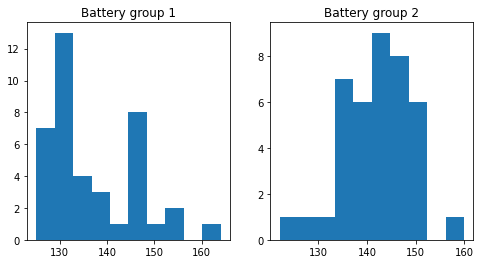

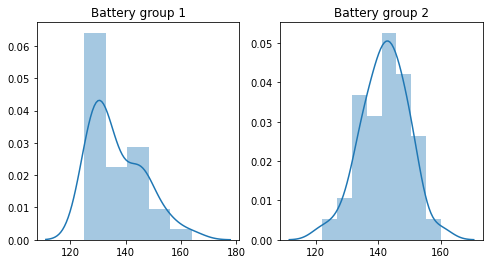

In [13]:
## 2. So sánh 2 nhóm pin ở bài toán 1 và ở bài toán 2 theo histogram và nhận xét
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.hist(life_array)
plt.title('Battery group 1')
plt.subplot(1, 2, 2)
plt.hist(life2_array)
plt.title('Battery group 2')
plt.show()

plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
sns.distplot(life_array)
plt.title('Battery group 1')
plt.subplot(1, 2, 2)
sns.distplot(life2_array)
plt.title('Battery group 2')
plt.show()

# Nhận xét:
#   Có nhiều dữ liệu hơn cho Battery 2 trong khoảng 140 so với Battery 1 trong khoảng 130.
#    Ngoài ra, mức độ biến thiên của Battery 2 ít hơn so với Battery 1.
#    Dựa trên các kết quả này, có thể kết luận rằng Battery 2 là một nhãn hiệu tốt hơn 
#    (trung bình cao hơn và biến thiên thấp hơn). 
#    Tuy nhiên, tính hợp lệ của kết luận này còn phụ thuộc vào cách thu thập dữ liệu.

In [14]:
## 3. Làm bảng phân phối tần suất cho dữ liệu theo các khoảng:
##         120-129, 130-139, 140-149, 150-159, 160-169.
freq2 = pd.Series()
freq2['120-129'] = np.extract((life2_array >= 120) & (life2_array <= 129), life2_array).size
freq2['130-139'] = np.extract((life2_array >= 130) & (life2_array <= 139), life2_array).size
freq2['140-149'] = np.extract((life2_array >= 140) & (life2_array <= 149), life2_array).size
freq2['150-159'] = np.extract((life2_array >= 150) & (life2_array <= 159), life2_array).size
freq2['160-169'] = np.extract((life2_array >= 160) & (life2_array <= 169), life2_array).size
print('Bảng phân phối tần suất:\n', freq2)

Bảng phân phối tần suất:
 120-129     2
130-139    11
140-149    20
150-159     6
160-169     1
dtype: int64


<ipython-input-14-6a8a07c14412>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  freq2 = pd.Series()


<BarContainer object of 5 artists>

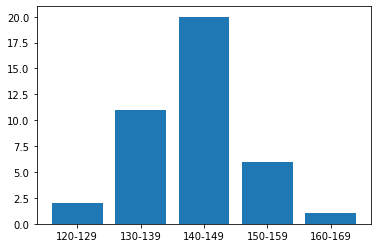

In [15]:
## 4. Vẽ biểu đồ khối cho bảng phân phối tần suất trên. 
##      Biểu đồ câu 2 và câu 4 nói lên điều gì?
plt.bar(freq2.index, freq2)

In [16]:
## 5. So sánh hai nhóm mẫu dựa trên thống kê chung (dùng stats.describe(array))
##      Nhận xét kết quả.
freq_df = pd.DataFrame({'Batteries 1':freq, 'Batteries 2':freq2})
print('Bảng phân phối tần suất chung:\n', freq_df)

print('Số liệu thống kê Battery 1:', stats.describe(life_array))
print('Số liệu thống kê Battery 2:', stats.describe(life2_array))
# Nhận xét:
#       - Battery 2 có tuổi thọ trung bình cao hơn và phương sai nhỏ hơn.
#       - Battery 1 có skewness > 0: phân phối lệch phải
#       - Battery 2 có skewness < 0: phân phối lệch trái
#       - Battery 1 có kurtosis < 0: phân bố này thấp hơn phân bố chuẩn
#       - Battery 2 có kurtosis > 0: phân bố này cao hơn phân bố chuẩn


Bảng phân phối tần suất chung:
          Batteries 1  Batteries 2
120-129           10            2
130-139           16           11
140-149           10           20
150-159            3            6
160-169            1            1
Số liệu thống kê Battery 1: DescribeResult(nobs=40, minmax=(125, 164), mean=136.85, variance=95.87435897435898, skewness=0.8455287049086152, kurtosis=-0.07613238307755621)
Số liệu thống kê Battery 2: DescribeResult(nobs=40, minmax=(122, 160), mean=141.925, variance=55.19935897435898, skewness=-0.2510338974166527, kurtosis=0.3567028000549164)


In [19]:
## 6. Tạo dataframe chứa tần suất của cả 2 nhóm mẫu gồm có 2 cột là batteries_1 
##    và batteries_2, index là các khoảng như câu 3
df = pd.DataFrame({'Batteries 1':life_array, 'Batteries 2':life2_array})
print('Số liệu thống kê:\n', df.describe())
print(df.info())

Số liệu thống kê:
        Batteries 1  Batteries 2
count    40.000000    40.000000
mean    136.850000   141.925000
std       9.791545     7.429627
min     125.000000   122.000000
25%     129.750000   137.500000
50%     132.500000   142.000000
75%     145.000000   146.250000
max     164.000000   160.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Batteries 1  40 non-null     int32
 1   Batteries 2  40 non-null     int32
dtypes: int32(2)
memory usage: 448.0 bytes
None


In [20]:
## Trộn 2 tập dữ liệu ?
dd = pd.melt(df, value_vars = ['Batteries 1', 'Batteries 2'], var_name = 'batteries')
print(dd.head())     

     batteries  value
0  Batteries 1    130
1  Batteries 1    145
2  Batteries 1    126
3  Batteries 1    146
4  Batteries 1    164


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:500: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:500: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,


<AxesSubplot:xlabel='value', ylabel='batteries'>

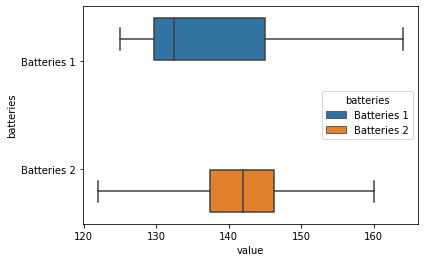

In [21]:
## Ngắt breakpoint tại đây
## Chạy tiếp tục mới cho kết quả đúng (?!) 
## 7. Vẽ boxplot cho cả 2 nhóm batteries_1 và batteries_2 => nhận xét
sns.boxplot(y = 'batteries', x = 'value', data = dd, hue = 'batteries', whis = 'range')

# Nhận xét:
#    - Nhóm Pin 1 không có outliers, nhóm Pin 2 có outliers (?)
#    - Phân phối Pin 2 tập trung hơn phân phối Battery 1
#    - Phạm vi của Battery 2 ngắn hơn so với Battery 1 (ít thay đổi hơn) 
#      và được chuyển sang bên phải (trung tâm cao hơn).
#